# Усилитель на транзисторе


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

### Эксперимент 2

##### Нахождение коэффициентов усиления

Text(0.5, 1.0, 'Определение коэффициента усиления при $f = 219 Гц$')

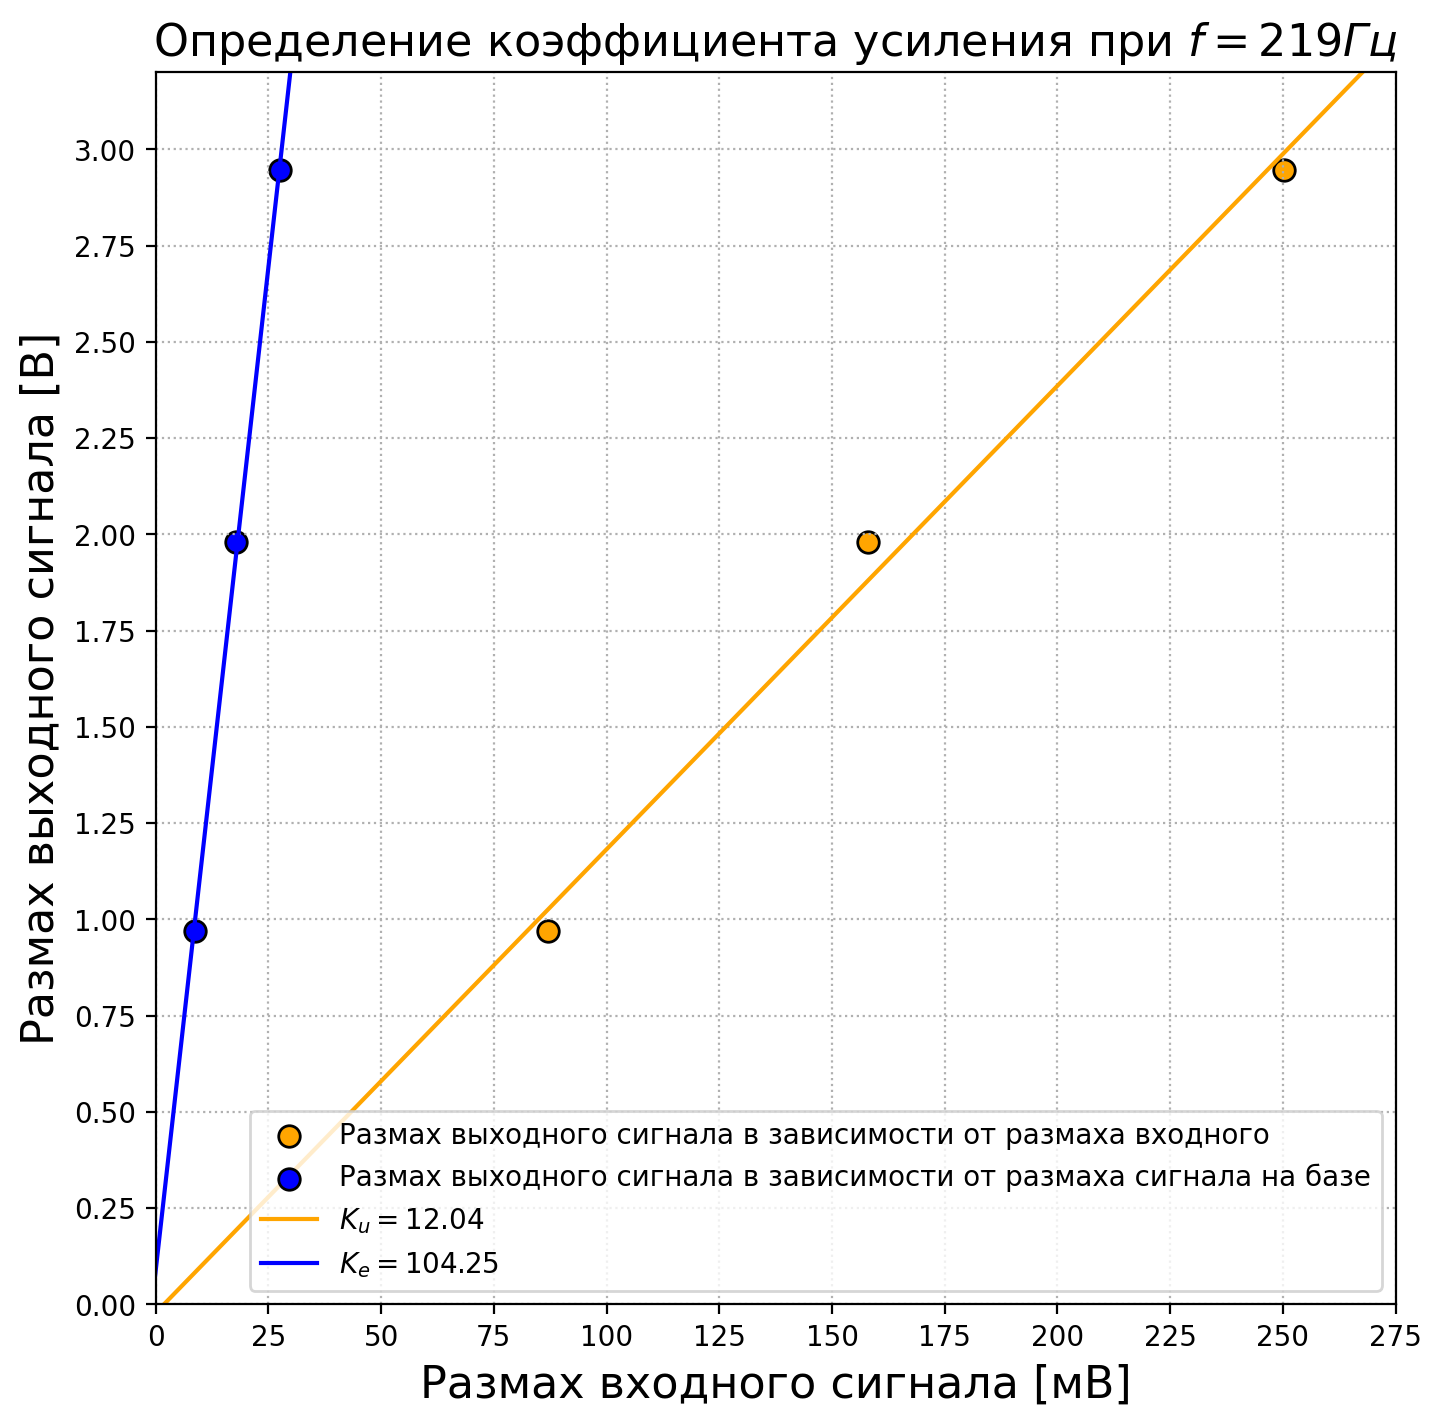

In [2]:
data = pd.read_csv(r"experiment_2/1_8_khom.csv")
MNK_u = linregress(x = data['sweep_osc[mV]'], y = data['sweep_output[V]'])
MNK_e = linregress(x = data['sweep_base[mV]'], y = data['sweep_output[V]'])
plt.figure(figsize = (8, 8), dpi = 200)
x_line = np.linspace(-20, 300, 1000)
plt.scatter(data['sweep_osc[mV]'], 
            data['sweep_output[V]'], 
            label = 'Размах выходного сигнала в зависимости от размаха входного',
            color = 'orange',
            s = 60,
            edgecolors = 'black')
plt.scatter(data['sweep_base[mV]'], 
            data['sweep_output[V]'], 
            label = 'Размах выходного сигнала в зависимости от размаха сигнала на базе',
            color = 'blue',
            s = 60,
            edgecolors = 'black')
plt.plot(x_line,
         MNK_u.slope * x_line + MNK_u.intercept, 
         color = 'orange', 
         label = f'$K_u = {1000 * MNK_u.slope:.2f}$')
plt.plot(x_line,
         MNK_e.slope * x_line + MNK_e.intercept, 
         color = 'blue', 
         label = f'$K_e = {1000 * MNK_e.slope:.2f}$')
plt.legend(fontsize = 10)
plt.yticks(np.arange(0, 5, 0.25))
plt.xticks(np.arange(0, 500, 25))
plt.ylim(0, 3.2)
plt.xlim(0, 275)
plt.ylabel("Размах выходного сигнала [В]", fontsize = 16)
plt.xlabel("Размах входного сигнала [мВ]", fontsize = 16)
plt.grid(ls = ':')
plt.title("Определение коэффициента усиления при $f = 219 Гц$", fontsize = 16)

##### АЧХ

Размах амплитуды генератора $2 U_{ген} = 154.7 мВ$

In [3]:
from scipy import optimize

In [4]:
def interp_func(x, low_band, high_band, log_slope, log_amp):
    if x<low_band:
        return np.log(log_slope * x) * log_amp 
    elif x < high_band:
        return 7
    return np.exp(-log_slope * x) * log_amp

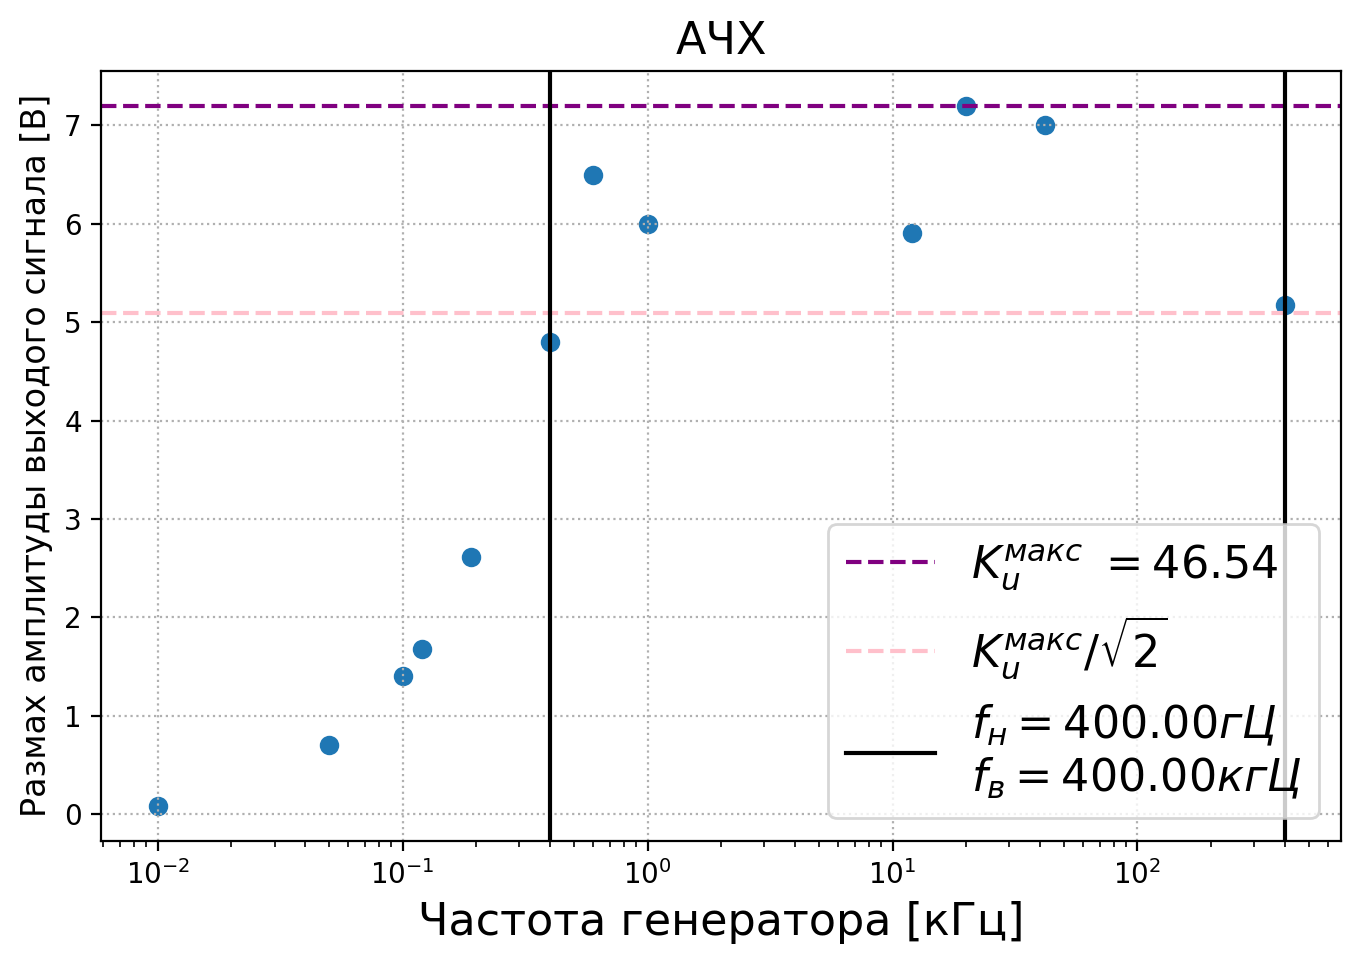

In [5]:
data = pd.read_csv("experiment_2/1_8_khom_afr.csv")
low_freq_mask = data['f'] / 1000 < 50
max_sweep = np.max(data['sweep_output'])
x_line = np.linspace(np.min(data['f']) / 1000, 60, 1000)
closest_to_sqrt_2_high = np.argmin(np.abs(data['sweep_output'] - max_sweep / np.sqrt(2)))
closest_to_sqrt_2_low = np.argmin(np.abs(data['sweep_output'][low_freq_mask] - max_sweep / np.sqrt(2)))
low_freq = data['f'][closest_to_sqrt_2_low]
high_freq = data['f'][closest_to_sqrt_2_high]
plt.figure(figsize=(8, 5), dpi = 200)
plt.xscale('log')
plt.scatter(data['f'] / 1000, data['sweep_output'])
plt.axhline(max_sweep, 
            color = 'purple',
            label = r'$K_{u}^{макс}$' + f' $ = {1000 * max_sweep / 154.7:.2f}$',
            linestyle = '--')
plt.axhline(max_sweep / np.sqrt(2), 
            color = 'pink',
            label = r'$K_{u}^{макс} / \sqrt{2}$',
            linestyle = '--')
plt.xlabel("Частота генератора [кГц]", fontsize = 16)
plt.ylabel("Размах амплитуды выходого сигнала [В]", fontsize = 12)
plt.grid(ls = ':')
plt.title("АЧХ", fontsize = 16)
plt.axvline(high_freq / 1000, color = 'black')
plt.axvline(low_freq / 1000, 
            color = 'black', 
            label = f'$f_н = {low_freq:.2f} гЦ$\n$f_в = {high_freq/1000:.2f} кгЦ$')
plt.legend(fontsize = 16, loc = 'lower right')

### Эксперимент 3

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

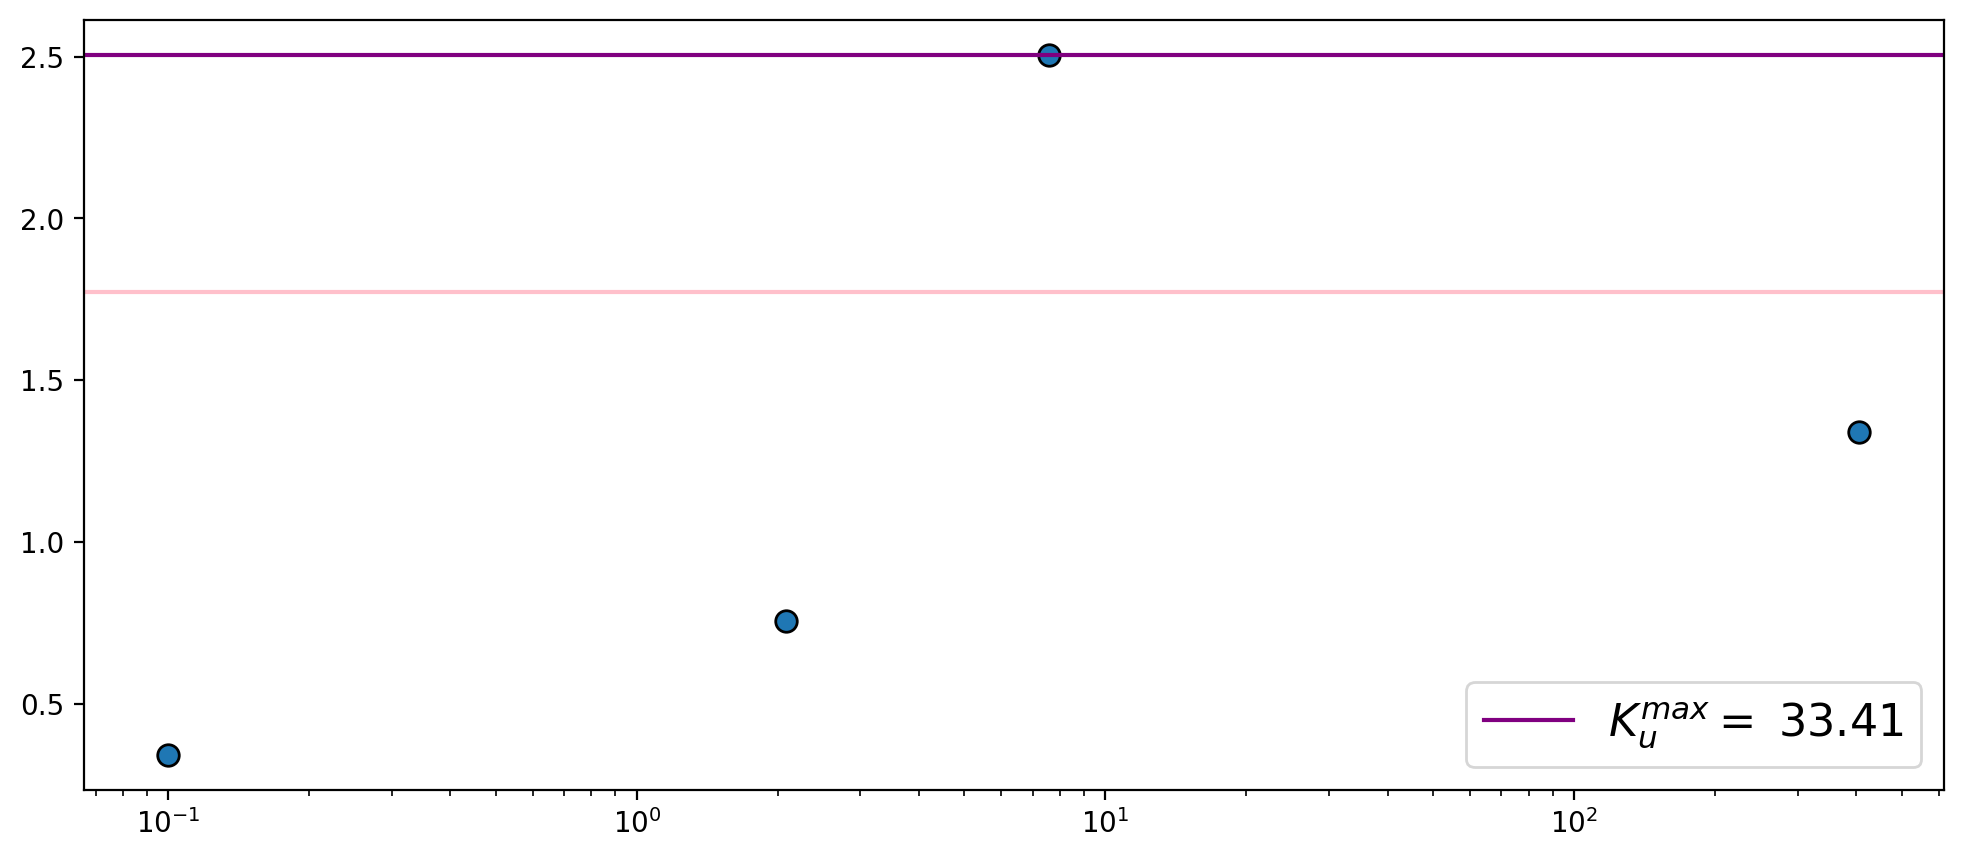

In [7]:
plt.figure(figsize=(12, 5), dpi=200)
data = pd.read_csv(r"experiment_3/data.csv")
max_output = np.max(data['sweep_output'])
max_output_sqrt_2 = np.max(data['sweep_output']) / np.sqrt(2)
plt.scatter(data['f'] / 1000, data['sweep_output'], s = 60, edgecolors = 'black')
plt.xscale('log')
plt.axhline(max_output,
            label = r'$K_u^{max}=$' + f' ${1000 * max_output / 75:.2f}$',
            color = 'purple')
plt.axhline(max_output_sqrt_2,
            color = 'pink')

plt.legend(fontsize = 16)


### Эксперимент 5

- $2 U_{ген} = 97 \ мВ$
- $2 U_{баз} = 22 \ мВ$

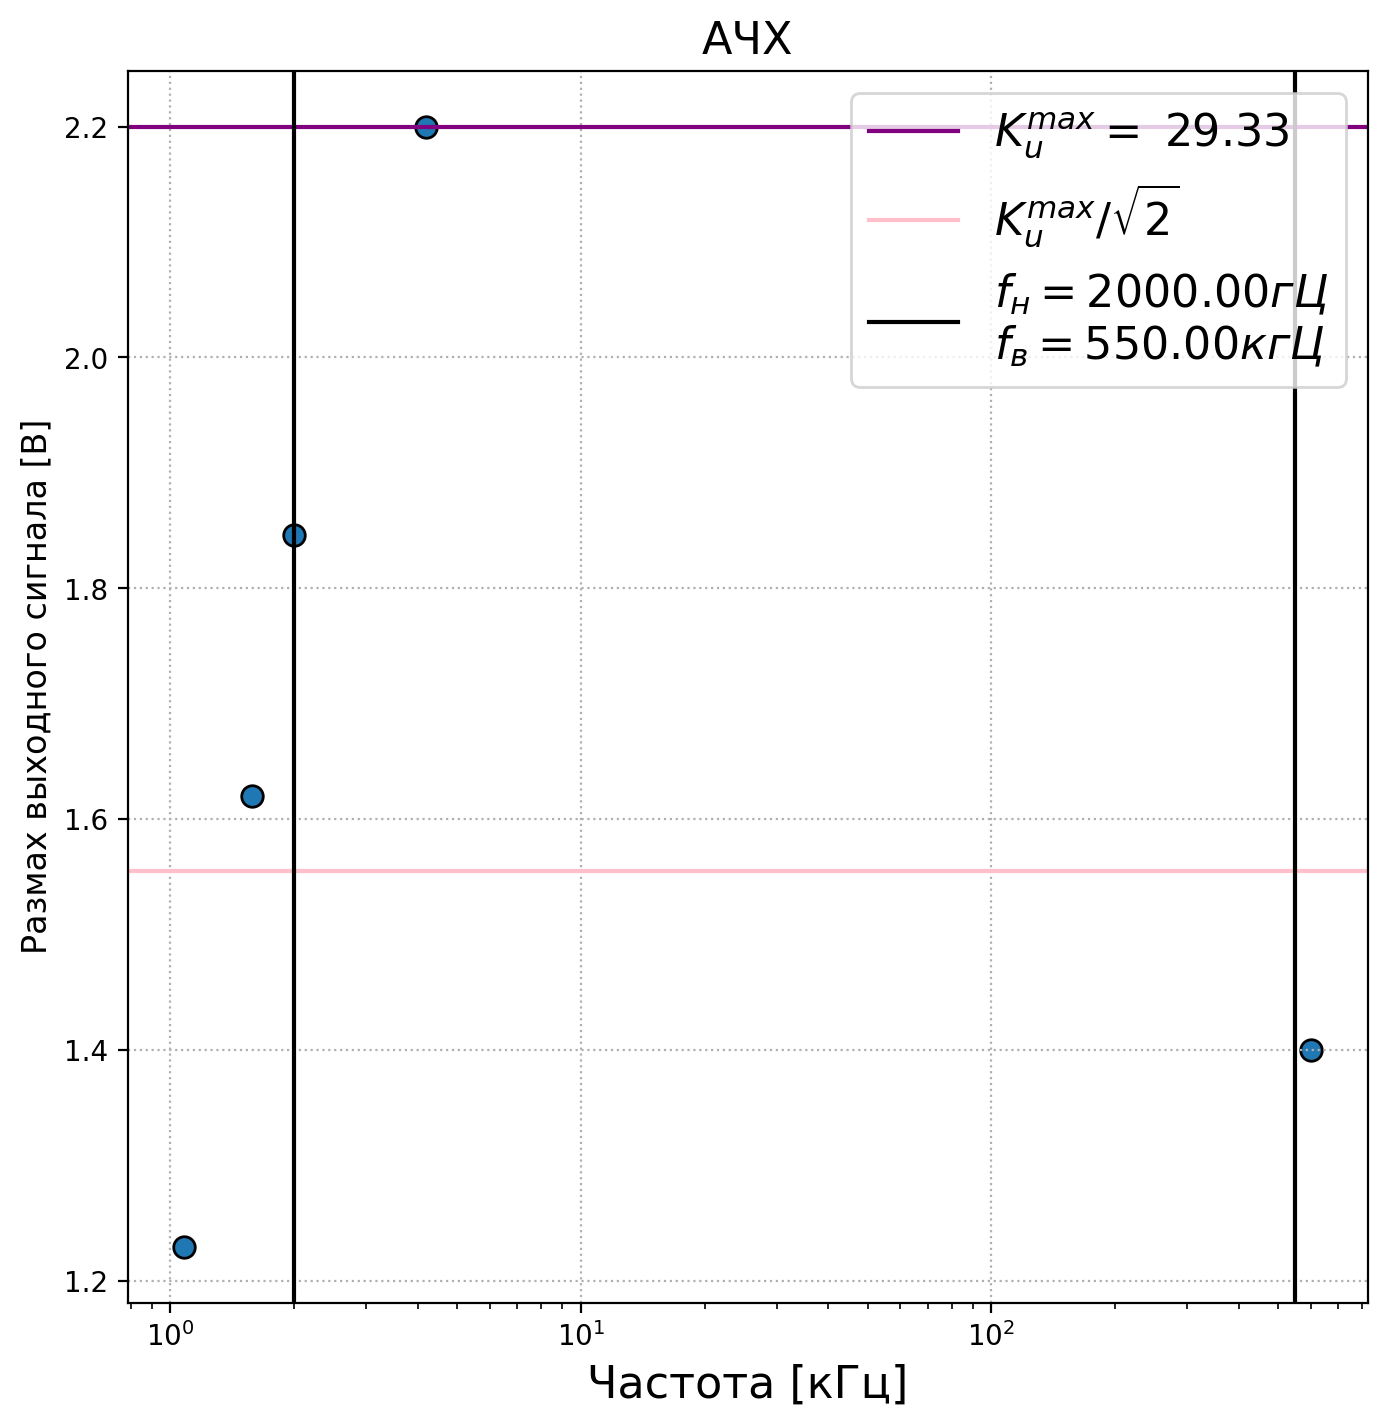

In [15]:
data = pd.read_csv(r'experiment_5/afr.csv')

plt.figure(figsize = (8, 8), dpi = 200)
low_freq_mask = data['f'] < 5000
high_freq_mask = data['f'] > 400 * 1e3
max_output = np.max(data['sweep_output'])
max_output_sqrt_2 = np.max(data['sweep_output']) / np.sqrt(2)
closest_to_sqrt_2_high = np.argmin(np.abs(data['sweep_output'][high_freq_mask] - max_output / np.sqrt(2)))
closest_to_sqrt_2_low = np.argmin(np.abs(data['sweep_output'][low_freq_mask] - max_output / np.sqrt(2)))
low_freq = data['f'][closest_to_sqrt_2_low]
high_freq = 550000
plt.scatter(data['f'] / 1000, data['sweep_output'], s = 60, edgecolors = 'black')
plt.xscale('log')
plt.axhline(max_output,
            label = r'$K_u^{max}=$' + f' ${1000 * max_output / 75:.2f}$',
            color = 'purple')
plt.axhline(max_output_sqrt_2,
            color = 'pink',
            label = r'$K_u^{max} / \sqrt{2}$')

plt.axvline(high_freq / 1000, color = 'black')
plt.axvline(low_freq / 1000, 
            color = 'black', 
            label = f'$f_н = {low_freq:.2f} гЦ$\n$f_в = {high_freq/1000:.2f} кгЦ$')
plt.legend(fontsize = 16, loc = 'upper right')
plt.xlabel("Частота [кГц]", fontsize = 16)
plt.ylabel("Размах выходного сигнала [В]", fontsize = 12)
plt.title("АЧХ", fontsize = 16)
plt.grid(ls = ':')